<a href="https://colab.research.google.com/github/klokesh656/FB-Stock-price-prediction-/blob/main/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A Machine learning model predict 30 days future stock price**

In [ ]:
pip install quandl

In [ ]:
import quandl
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split


In [ ]:
df=quandl.get("WIKI/FB")
df.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-21,164.80,173.40,163.30,169.39,105350867.0,0.0,1.0,164.80,173.40,163.30,169.39,105350867.0
2018-03-22,166.13,170.27,163.72,164.89,73389988.0,0.0,1.0,166.13,170.27,163.72,164.89,73389988.0
2018-03-23,165.44,167.10,159.02,159.39,52306891.0,0.0,1.0,165.44,167.10,159.02,159.39,52306891.0
2018-03-26,160.82,161.10,149.02,160.06,125438294.0,0.0,1.0,160.82,161.10,149.02,160.06,125438294.0
2018-03-27,156.31,162.85,150.75,152.19,76787884.0,0.0,1.0,156.31,162.85,150.75,152.19,76787884.0


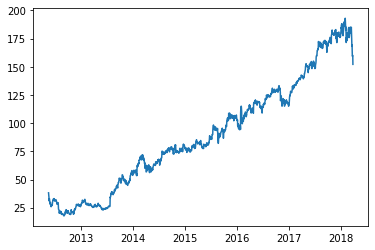

In [ ]:
df=df[['Adj. Close']]
df.head()
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(df) 

In [ ]:
forecast_days = 30
df['prediction'] = df['Adj. Close'].shift(-forecast_days)
df.tail()

,Adj. Close,prediction
Date,,
2018-03-21,169.39,NaN
2018-03-22,164.89,NaN
2018-03-23,159.39,NaN
2018-03-26,160.06,NaN
2018-03-27,152.19,NaN


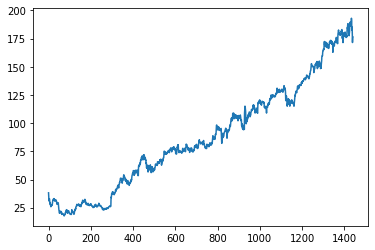

In [ ]:
#create the independent data set(x)
#convert dataframe to numpy array
x=np.array(df.drop(['prediction'],1))
x=x[:-forecast_days]
plt.plot(x)


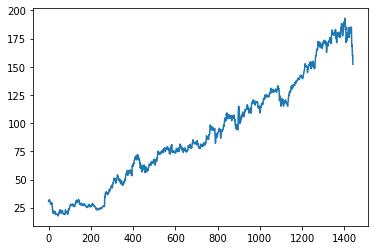

In [ ]:
#create a dependent data set(y)
#convert the dataframe to numpy array (all value including nan)
y= np.array(df['prediction'])
y = y[:-forecast_days]
plt.plot(y)

In [ ]:
#split the data into 80% training and 20% testing
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [ ]:
#create and train the support vector machine(Regressor)
svr_rbf = SVR(kernel= 'rbf',C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, gamma=0.1)

In [ ]:
#Testing model : score rerturns the coeffiecient of determination r^2 of the prediction
#the bes tpossible score is 1..0
svm_cnfidence = svr_rbf.score(x_test,y_test)
#svm_result=svr_rbf.predict(y)


In [ ]:
lr= LinearRegression()
lr.fit(x_train, y_train)
lr_confidence = lr.score(x_test,y_test)





array([173.15, 179.52, 179.96, 177.36, 176.01, 177.91, 178.99, 183.29,
       184.93, 181.46, 178.32, 175.94, 176.62, 180.4 , 179.78, 183.71,
       182.34, 185.23, 184.76, 181.88, 184.19, 183.86, 185.09, 172.56,
       168.15, 169.39, 164.89, 159.39, 160.06, 152.19])

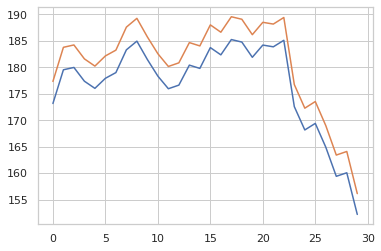

In [ ]:
#set forecast equal to the last 30 rows of the original data set frm adj.clsoe column
x_forecast = np.array(df.drop(['prediction'],1))[-forecast_days:]
lr_result=lr.predict(x_forecast)
plt.plot(x_forecast)
plt.plot(lr_result)
x_forecast_new =x_forecast[:,0]
x_forecast_new

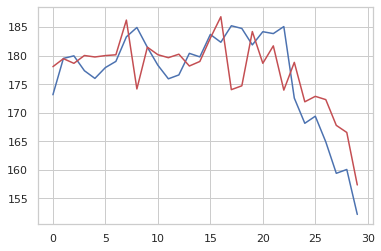

In [ ]:
svm_prediction = svr_rbf.predict(x_forecast)
plt.plot(x_forecast, color='b')
plt.plot(svm_prediction, color='r')

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf= RandomForestRegressor()
rf.fit(x_train,y_train)
rf_cnfidence = rf_prediction.score(x_test,y_test)
rf_array=rf_prediction.score(x_test,y_test)

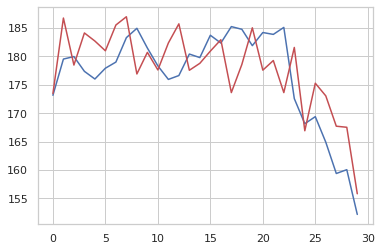

In [ ]:
rf_result = rf.predict(x_forecast)
plt.plot(x_forecast, color='b')
plt.plot(rf_result, color='r')

In [ ]:
print("linear regression confidence: ", lr_confidence)
print("svm confidence                ",  svm_cnfidence)
print("random forest confidence      ",  rf_cnfidence)

linear regression confidence:  0.9804418899470678
svm confidence                 0.9799140171637111
random forest confidence       0.9813517870279318


In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
data1=np.stack((x_forecast_new,lr_result,svm_prediction, rf_result), axis=1)
new_df = pd.DataFrame(data1, columns=['actual','lr results','svm results','rf results'])
new_df.head()


,actual,lr results,svm results,rf results
0,173.15,177.322815,178.069194,173.4562
1,179.52,183.766143,179.468194,186.7356
2,179.96,184.211208,178.650673,178.4650
3,177.36,181.581279,180.021811,184.1121
4,176.01,180.215738,179.763427,182.6883


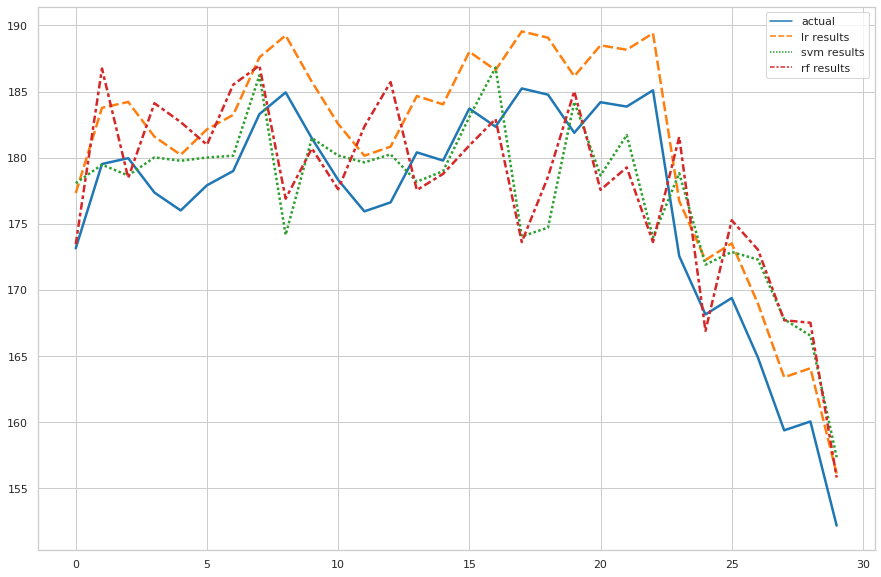

In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(data=new_df, palette="tab10", linewidth=2.5)